# Genetic Algorithm Tessellation
In this notebook, we'll use genetic algorithms to create tessellations!

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..") # Move execution to root dir

In [15]:
from enum import Enum, auto
from typing import Callable, Iterator, Optional

import numpy as np
from matplotlib import pyplot as plt 
from leap_ec import ops, probe
from leap_ec.algorithm import generational_ea
from leap_ec.representation import Representation

from tessellation.draw import MPLDrawer
from tessellation.procgen.generator import ALL_ACTIONS, Action, Generator 
from tessellation.procgen.ga.evolution import Mutator
from tessellation.procgen.ga.genome import TessellationDecoder
from tessellation.procgen.ga.heuristics import count_number_points_heuristic
from tessellation.procgen.ga.problem import TessellationProblem, initialize_genome

## Configuration

In [3]:
# Proc gen constants
SEED = 32
SIDE_LEN = 100

# Genetic Algorithm config
SIDE_LEN = 100
MUTATION_PROB = 0.1
POP_SIZE = 10
MAX_GENERATIONS = 20

# Draw config
CMAP = "gray"
drawer = MPLDrawer(CMAP)    

## Genetic Algorithm Tessellation
We'll be using the LEAP package for our genetic algorithms.

### Simple test
Let's start by trying out the simplest form of GA - simple real-valued function optimization.

In [4]:
from leap_ec.simple import ea_solve

def f(x):
    """A real-valued function to optimized."""
    return sum(x)**2

ea_solve(f, bounds=[(-5.12, 5.12) for _ in range(5)], maximize=True)

step,bsf
0,213.0871863162543
1,295.53593180674187
2,295.53593180674187
3,295.53593180674187
4,422.3209641401956
5,422.3209641401956
6,422.3209641401956
7,422.3209641401956
8,437.8530222632914
9,470.93666367621154
10,482.20196416052346
11,482.20196416052346
12,573.9565261593353
13,573.9565261593353
14,601.4525992720552
15,601.4525992720552
16,601.4525992720552
17,601.4525992720552
18,601.4525992720552
19,633.6456725128428
20,633.6456725128428
21,633.6456725128428
22,638.7721394036669
23,652.294145866975
24,652.294145866975
25,652.294145866975
26,652.294145866975
27,652.294145866975
28,652.294145866975
29,652.294145866975
30,652.294145866975
31,652.294145866975
32,652.294145866975
33,652.294145866975
34,652.294145866975
35,652.294145866975
36,652.294145866975
37,652.294145866975
38,652.294145866975
39,655.3600000000001
40,655.3600000000001
41,655.3600000000001
42,655.3600000000001
43,655.3600000000001
44,655.3600000000001
45,655.3600000000001
46,655.3600000000001
47,655.3600000000001
48,

array([5.12, 5.12, 5.12, 5.12, 5.12])

### Build out Genetic Algorithm

In [8]:
problem = TessellationProblem(
    heuristic_fns=[count_number_points_heuristic], side_len=SIDE_LEN
)

representation = Representation(
    decoder=TessellationDecoder(),
    initialize=lambda: initialize_genome(problem) 
)
mutator = Mutator(mutation_prob=MUTATION_PROB)

In [16]:
final_pop = generational_ea(
    max_generations=MAX_GENERATIONS, 
    pop_size=POP_SIZE,
    problem=problem,
    representation=representation,

    # The operator pipeline
    pipeline=[
        # Select parents via tournament_selection selection
        ops.tournament_selection,
        
        ops.clone,  # Copy them (just to be safe)
        
        # Basic mutation, mutate actions randomly
        mutator.mutate_actions_randomly,
        
        # Crossover with a 40% chance of swapping each gene
        # ops.UniformCrossover(p_swap=0.4),
        
        ops.evaluate,  # Evaluate fitness
        
        # Collect offspring into a new population
        ops.pool(size=POP_SIZE),
        
        probe.BestSoFarProbe()  # Print the BSF
    ]
)

step,bsf
0,[101.]
1,[101.]
2,[101.]
3,[101.]
4,[101.]
5,[101.]
6,[101.]
7,[101.]
8,[101.]
9,[101.]
10,[101.]
11,[101.]
12,[101.]
13,[101.]
14,[101.]
15,[101.]
16,[101.]
17,[101.]
18,[101.]
19,[101.]


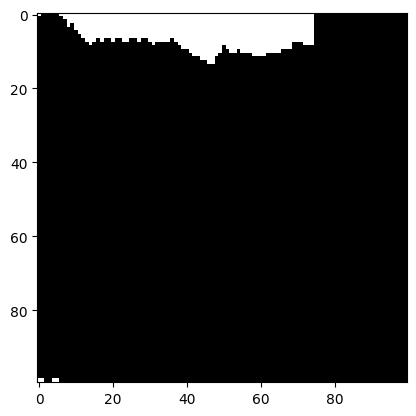

Press 'q' to quit, anything else to continue...


 q


In [18]:
from IPython.display import clear_output

for individual in final_pop:
    genome = individual.genome
    mask = np.zeros((SIDE_LEN, SIDE_LEN))
    mask = Generator._draw_line(mask, genome.start_point, genome.actions)

    drawer.draw(mask)
    plt.show()
    print("Press 'q' to quit, anything else to continue...")
    user_action = input()
    

    if user_action.lower() == "q":
        break
    clear_output()
    